# Imports

In [9]:
from nb_utils import set_root
PROJECT_DIR = set_root(1)

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Parameters

In [11]:
path_data = PROJECT_DIR / 'data'
path_raw = path_data / '01_raw'
path_assets = path_data / 'assets'
path_intermediate = path_data / '02_intermediate'

file_path_data = path_raw / 'data.txt'
file_path_save = path_intermediate / 'magic.csv'

In [12]:
column_names = [
    "fLength",
    "fWidth",
    "fSize",
    "fConc",
    "fConc1",
    "fAsym",
    "fM3Long",
    "fM3Trans",
    "fAlpha",
    "fDist",
    "class"
]

# Read

In [13]:
data = pd.read_csv(file_path_data, sep=",", header=None)
data = data.drop(0, axis=1).reset_index(drop=True)
data.columns = column_names

# Plots

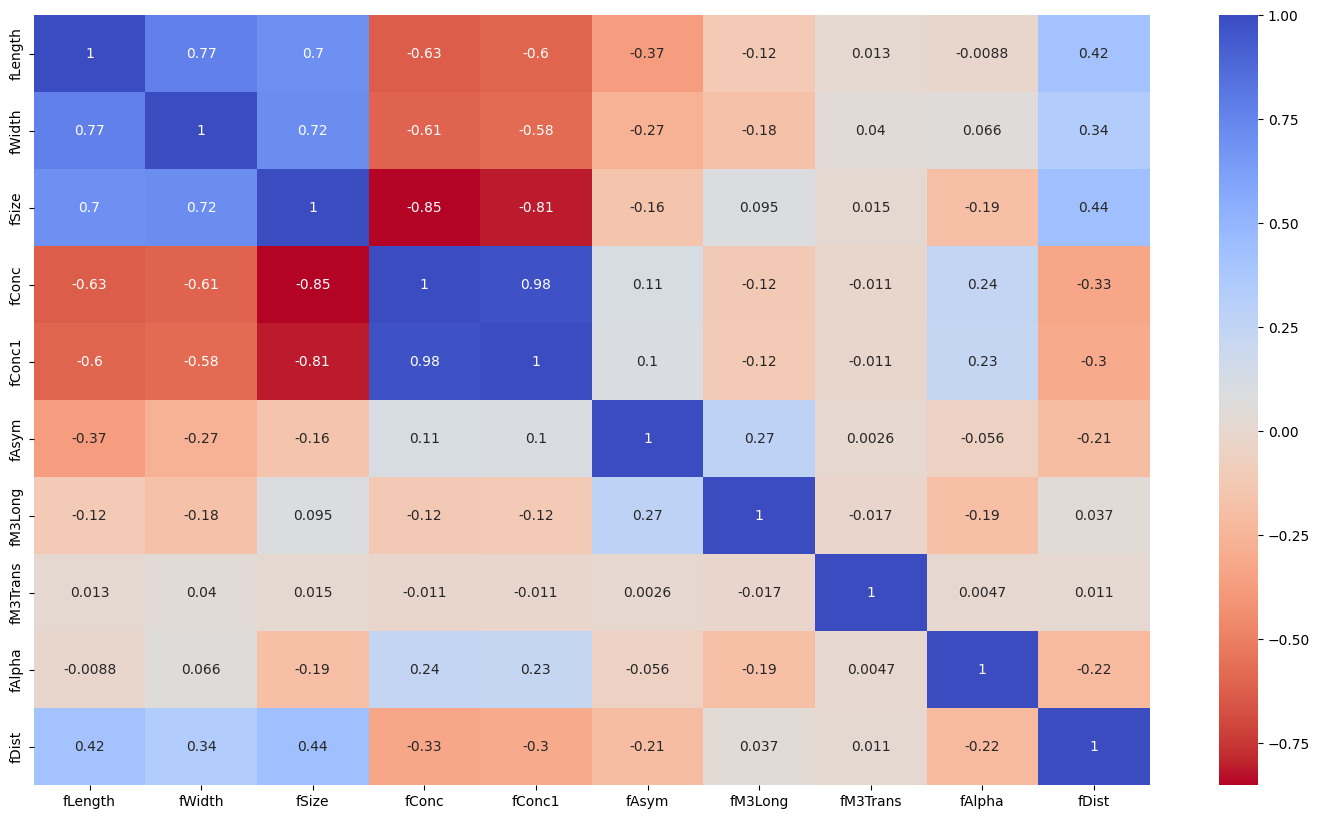

In [28]:
data_corr = data.drop("class", axis=1).corr()
fig_hm, ax_hm = plt.subplots(1, 1, figsize=(18, 10))
cmap = sns.color_palette("coolwarm", as_cmap=True)
cmap = cmap.reversed( )
sns.heatmap(data.drop("class", axis=1).corr(), ax = ax_hm, annot=True, cmap=cmap)
#ax_hm.set_title("Heatmap da corralação entre as variáveis")
fig_hm.savefig(path_assets / 'heatmap_corr.png', dpi=400, transparent=True)

In [34]:
data["class"].value_counts()

class
g    12332
h     6688
Name: count, dtype: int64

In [30]:
data_corr[["fLength", "fWidth", "fSize", "fConc", "fConc1"]]

,fLength,fWidth,fSize,fConc,fConc1
fLength,1.000000,0.770512,0.702454,-0.630999,-0.598145
fWidth,0.770512,1.000000,0.717517,-0.609779,-0.581141
fSize,0.702454,0.717517,1.000000,-0.850850,-0.808835
fConc,-0.630999,-0.609779,-0.850850,1.000000,0.976412
fConc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000
fAsym,-0.368556,-0.266961,-0.159863,0.112272,0.100159
fM3Long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769
fM3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966
fAlpha,-0.008777,0.066061,-0.186675,0.235272,0.229799
fDist,0.418466,0.336816,0.437041,-0.328332,-0.304625


In [15]:
data_std = pd.DataFrame(
    StandardScaler().fit_transform(data.drop('class', axis=1)),
    columns=column_names[:-1]
)
data_std["class"] = data["class"]
data_melted = pd.melt(data_std, id_vars=["class"], var_name="variable", value_name="value")

In [16]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_pca = pca.fit_transform(data.drop("class", axis=1))

/tmp/ipykernel_129699/1332195373.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


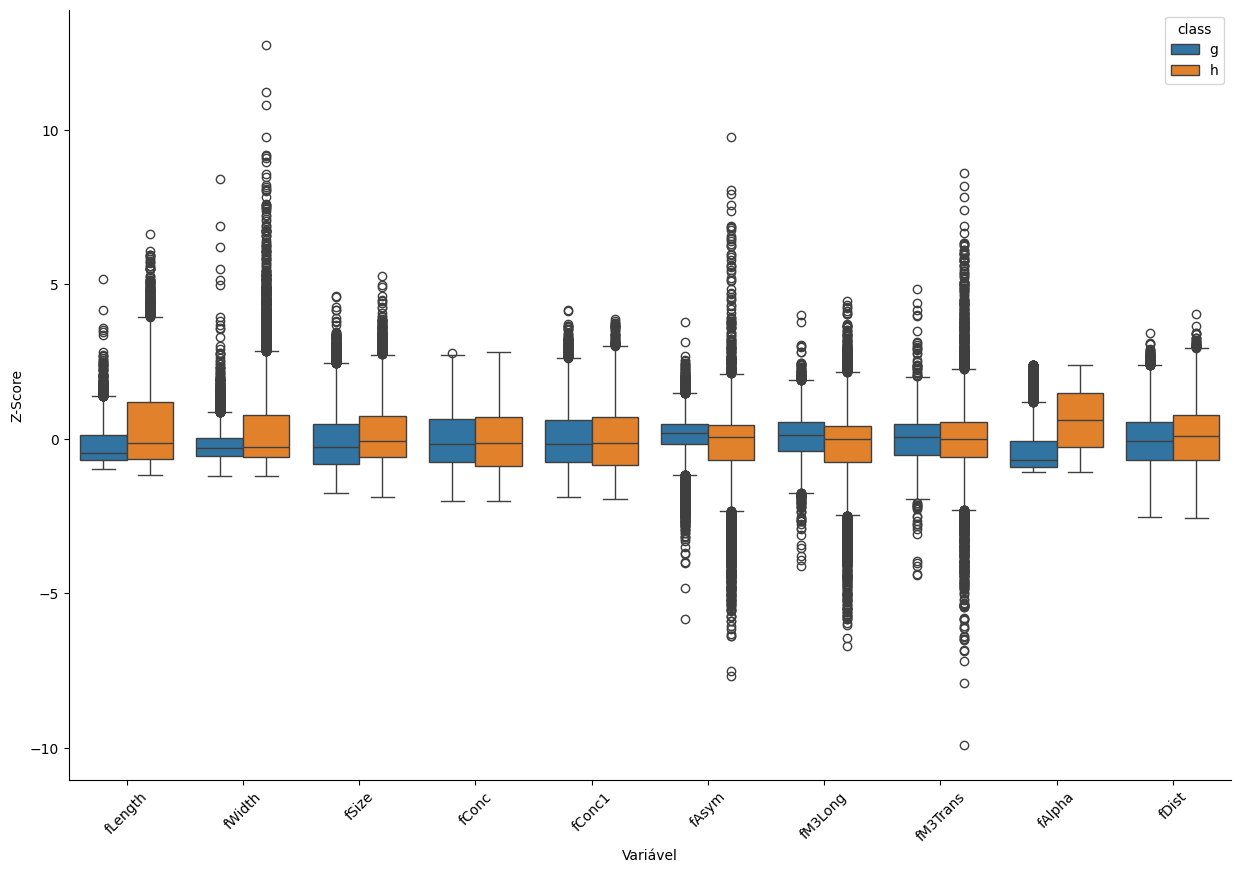

In [91]:
fig, ax = plt.subplots(1, 1,  figsize=(15, 10))
sns.boxplot(x="variable", y="value", hue="class", data=data_melted, ax = ax)
#ax.set_title('Boxplot para cada variável padronizada em torno da média')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel("Variável")
ax.set_ylabel("Z-Score")
ax.spines[["top", "right"]].set_visible(False)
fig.savefig(path_assets / 'boxplot.png', dpi=400, transparent=True)


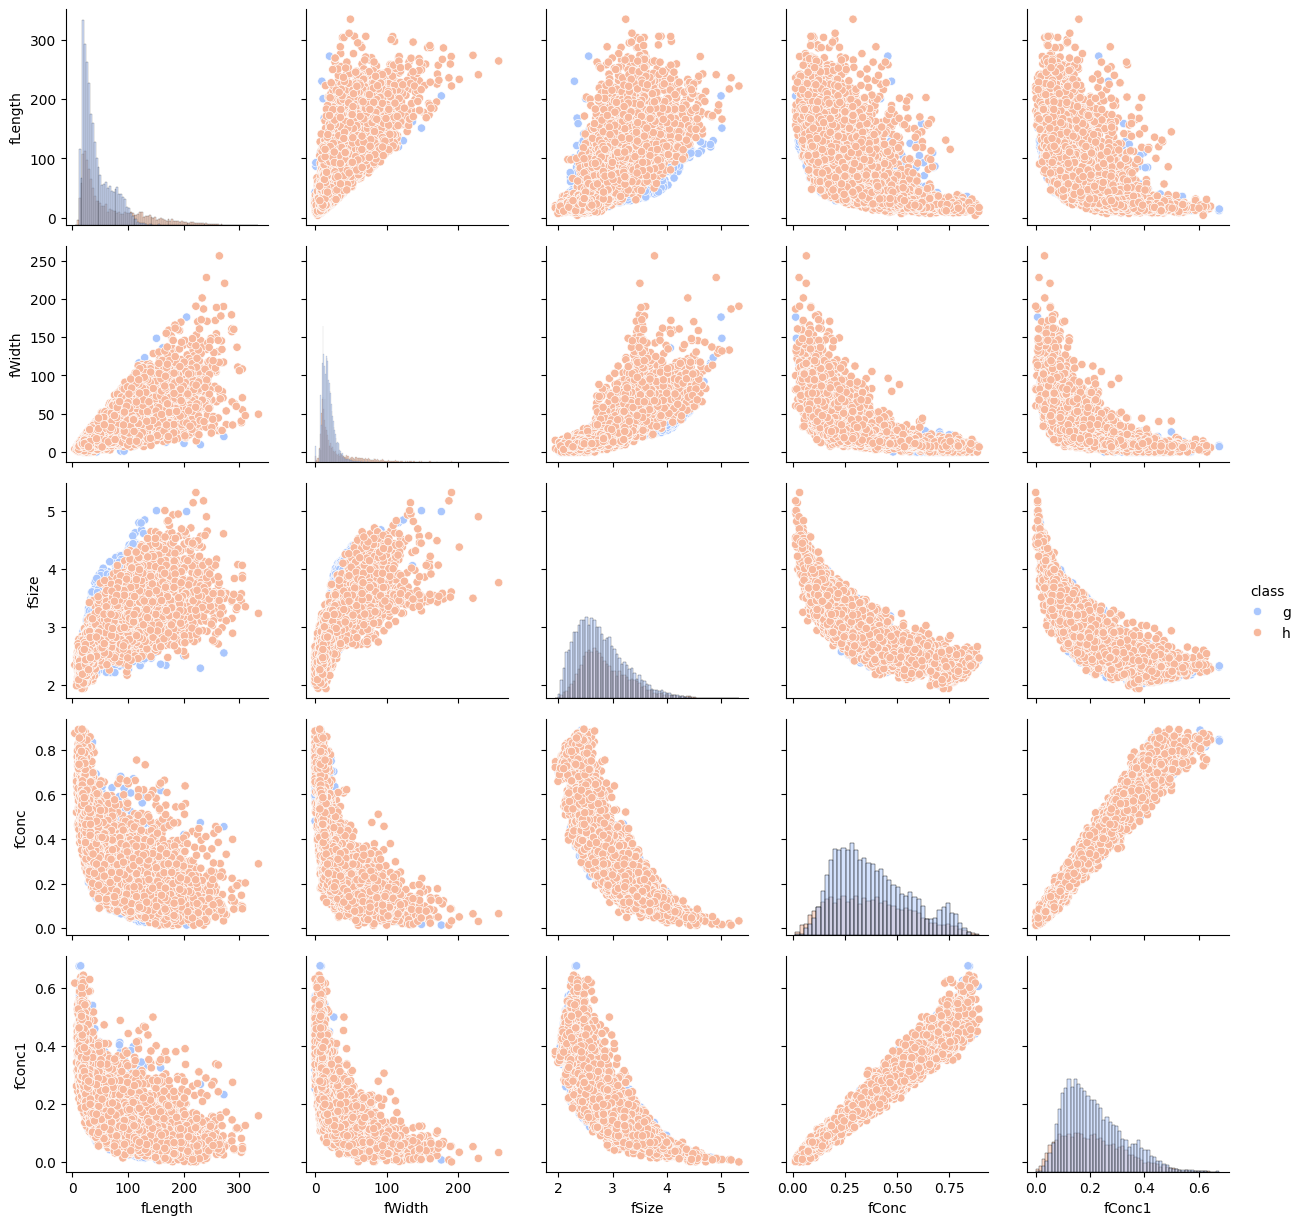

In [32]:
g = sns.PairGrid(data[["fLength", "fWidth", "fSize", "fConc", "fConc1", "class"]], hue="class", palette="coolwarm")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.savefig(path_assets / 'pairplot.png', dpi=400, transparent=True)
plt.show()

# Save

In [48]:
data.to_csv(file_path_save, index=False)